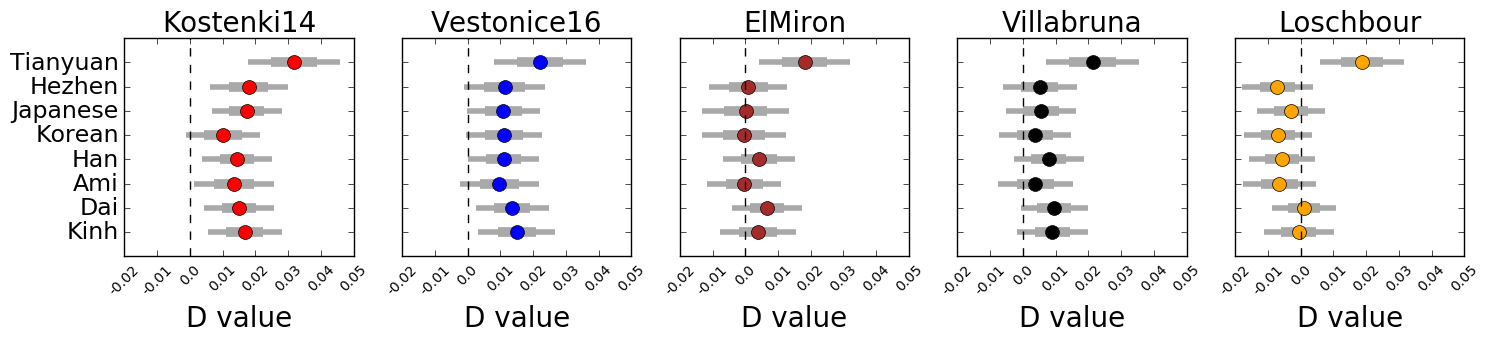

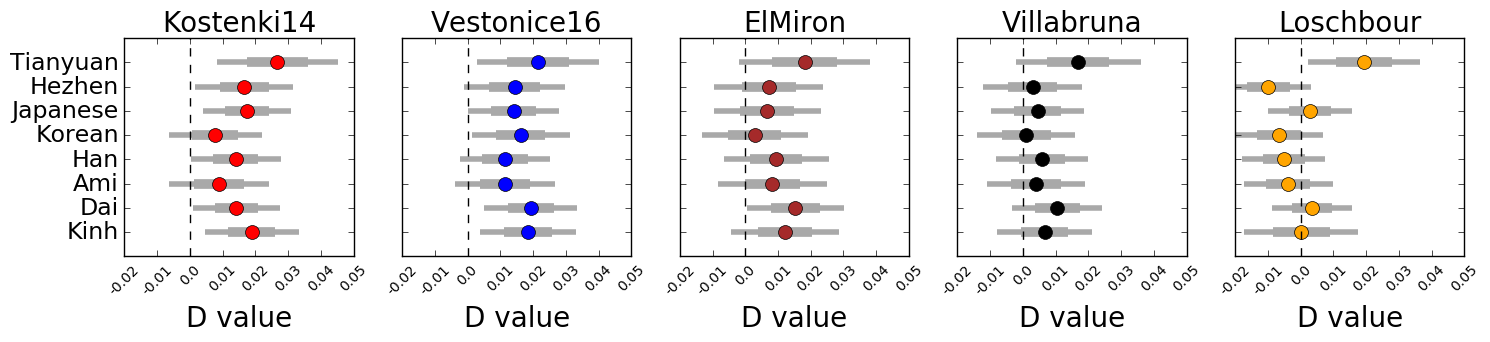

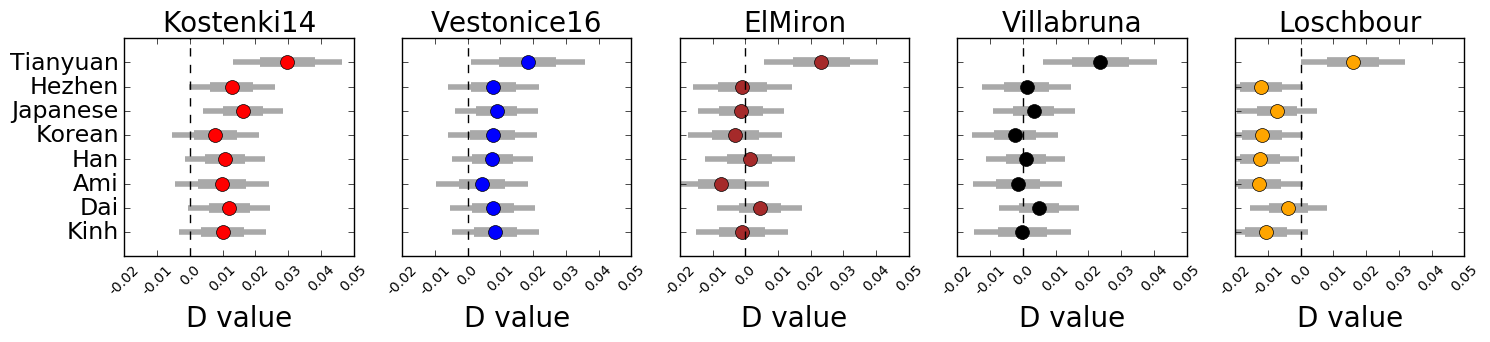

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import plotting_funcs as pf
pD = "/home/mel_yang/projects/allTYstuff/TY_Q116/"
fhs = ["UPA_all2.rn1.071316","UPA_all2.rn1.071316.transv"]
fhs = ["UPA_all2.rn1.071316","UPA_all2.rn1.071316.transv","UPA_all5"]
titles=[", All Sites",", Transversions Only",", Damage-Restricted"]
out="Mbuti"
mysets = ["CS_GoyetQ116-1_Asn_%s" % out,"CS_GoyetQ116-1_Asn_%s" % out,"CS_GoyetQ116-1_O_d_Asn_%s" % out]
outs = ['Mbuti']

otherpops = ['TY','Ami', 'Atayal', 'Burmese', 'Cambodian', 'Dai', 'Daur', 
              'Han', 'Hezhen', 'Japanese', 'Kinh', 'Korean', 'Lahu', 
              'Miao', 'Naxi', 'Oroqen', 'She', 'Thai', 'Tu', 'Tujia', 
              'Xibo', 'Yi'] ##Remove Uygur
easpops = ['Oroqen', 'Daur', 'Hezhen', 'Xibo', 'Japanese', 
             'Korean', 'Tu', 'Han', 'Tujia', 'Miao', 'Yi', 'She', 
             'Naxi', 'Atayal', 'Ami', 'Lahu', 'Dai', 'Kinh', 
             'Burmese', 'Thai', 'Cambodian'] ##BY LATITUDE
easpops = ['Hezhen','Japanese','Korean','Han','Ami','Dai','Kinh'] 
#easpops = ['Dai','Han','Ami','Atayal']
wantedpops = easpops[::-1]+['TY']
#wantedpops[-1] = 'Tianyuan'
myeurs = ['Kostenki14','Vestonice16','ElMiron','Villabruna','Loschbour']
#myeurs = ['Ostuni1','Ostuni2','ElMiron','HohleFels49','Rigney1']
#myeurs = ['Kostenki14','GoyetQ116-1','Vestonice16','Villabruna','Loschbour']
myname="CSold"
for indfh,fh in enumerate(fhs):
    for out in outs:
        #myset = "CS_GoyetQ116-1_Asn_%s" % out
        #myset = "CS_ElMiron_Asn_%s" % out
        myset = mysets[indfh]
        main = ("Tianyuan","TY")
        fig = plt.figure(figsize=(15,3.5)) #18,8
        colors = ['red','blue','brown','black','orange']
        #myxmins = [-0.05]*len(myeurs)
        #myxmaxs = [0.03]*len(myeurs)
        myxmins = [-0.02]*len(myeurs)
        myxmaxs = [0.05]*len(myeurs)
        mylabel = ['A','B','C','D','E']
        if 'transv' in fh: mylabel = ['F','G','H','I','J']
        if '_O_d' in myset: mylabel = ['K','L','M','N','O']
        mylabellocation = [-0.05]*len(myeurs)
        
        #labels = [('P3','D(%s,P2,X,%s)' % (main[0],out),'X=')]*len(myeurs)
        for mysubplot,myeur in enumerate(myeurs):
            ax1=fig.add_subplot(1,5,mysubplot+1)
            
            #myylabel,mytitle,legendadd = labels[mysubplot]
                
            mycond = True if 'tp' in myset else False
            myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Zmat',mycond)
            myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Dmat',mycond)
            mySEary=myDary/myZary
            goodpops2 = [mypops2.index(i) for i in wantedpops]
            #getsmaller = [5,5,5]
            #myDary=-myDary
            goodpops1 = mypops1.index(myeur)
            myys = np.array(range(len(goodpops2)))
            tyD = myDary[goodpops2,goodpops1]
            tySE = mySEary[goodpops2,goodpops1]
            ax1.errorbar(-tyD,myys,xerr=tySE, color='darkgrey',fmt='o',capthick=0,linewidth=7)
            ax1.errorbar(-tyD,myys,xerr=2*tySE, color='darkgrey',fmt='o',capthick=0,linewidth=4)
            ax1.plot(-tyD,myys,'o',markersize=10,color=colors[mysubplot])
            
            ax1.set_yticks(myys) #,rotation=45)
            if mysubplot==0:
                ax1.set_yticklabels(wantedpops[:-1]+['Tianyuan'],fontsize=17)
            else: 
                ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
            ax1.set_ylim(-1,len(goodpops2))
            ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])
    
            xlabel = ax1.get_xticks().tolist()
            ax1.set_xticklabels(xlabel,rotation=45)
            
            ax1.set_title(myeur,fontsize=20)
            #ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
            ax1.axvline(x=0, ls='dashed', c='black')
            #ax1.axhline(y=20.5, ls='dashed', c='black')
            ax1.set_xlabel('D value',fontsize=20)
            #ax1.set_ylabel(myylabel,rotation=90,fontsize=17)
            #ax1.text(mylabellocation[mysubplot],-3.5,mylabel[mysubplot],fontsize=20)

            #mypatches = [mpatches.Patch(color=colors[ind], label=legendadd+i) for ind,i in enumerate(myeur)]
            #ax1.legend(loc='upper right',fontsize=10,handles=mypatches)
        #l = plt.legend(bbox_to_anchor=(-2,-0.1,3,-0.1),handles=mypatches,fontsize=11.5,ncol=4,mode="expand") #loc=leglocation[mysubplot], 
        #l.draw_frame(False)
        plt.tight_layout()
        plt.savefig(pD+fh+'.Dfig.'+myname+'.png',bbox_inches='tight')

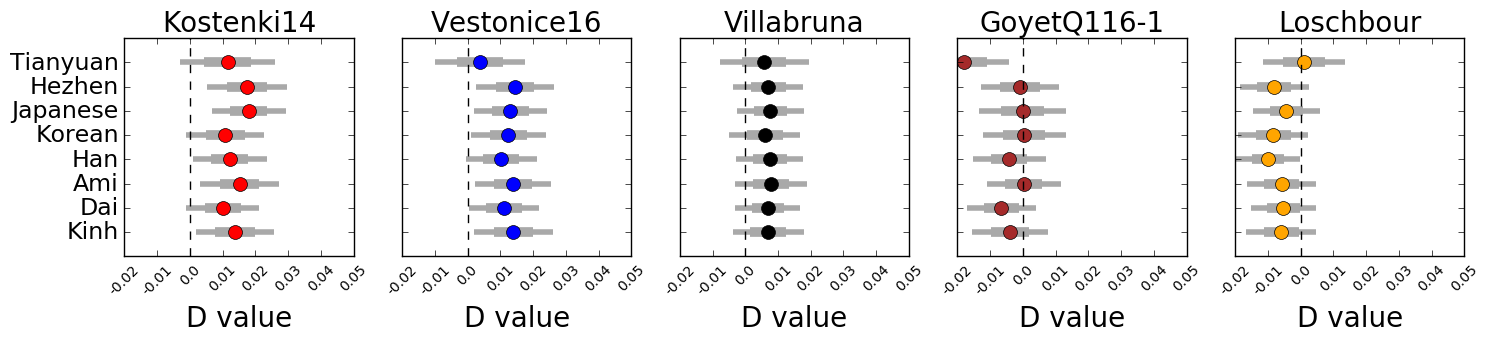

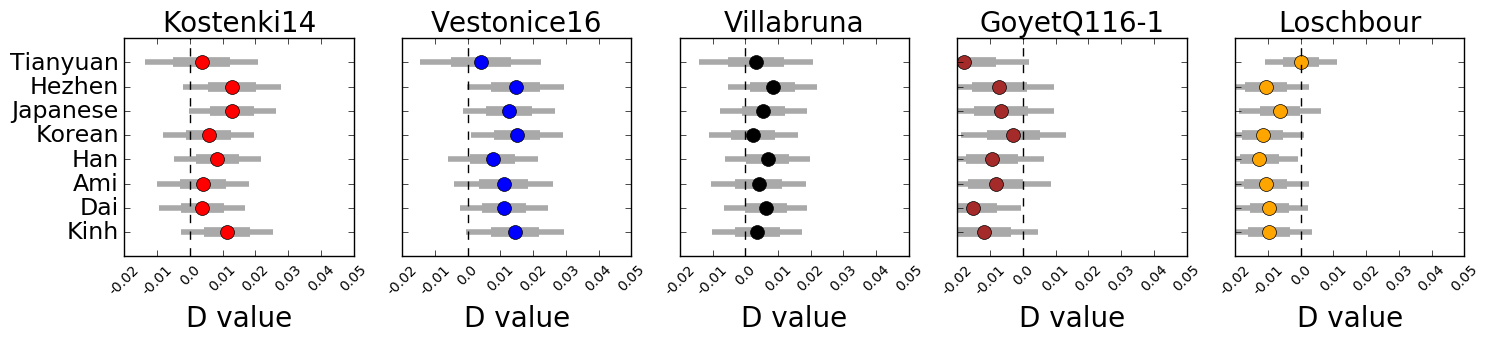

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import plotting_funcs as pf
pD = "/home/mel_yang/projects/allTYstuff/TY_Q116/"
fhs = ["UPA_all2.rn1.071316","UPA_all2.rn1.071316.transv"]
outs = ['Mbuti']

otherpops = ['TY','Ami', 'Atayal', 'Burmese', 'Cambodian', 'Dai', 'Daur', 
              'Han', 'Hezhen', 'Japanese', 'Kinh', 'Korean', 'Lahu', 
              'Miao', 'Naxi', 'Oroqen', 'She', 'Thai', 'Tu', 'Tujia', 
              'Xibo', 'Yi'] ##Remove Uygur
easpops = ['Oroqen', 'Daur', 'Hezhen', 'Xibo', 'Japanese', 
             'Korean', 'Tu', 'Han', 'Tujia', 'Miao', 'Yi', 'She', 
             'Naxi', 'Atayal', 'Ami', 'Lahu', 'Dai', 'Kinh', 
             'Burmese', 'Thai', 'Cambodian'] ##BY LATITUDE
easpops = ['Hezhen','Japanese','Korean','Han','Ami','Dai','Kinh'] 
#easpops = ['Dai','Han','Ami','Atayal']
wantedpops = easpops[::-1]+['TY']
#wantedpops[-1] = 'Tianyuan'
#myeurs = ['Kostenki14','Vestonice16','ElMiron','Villabruna','Loschbour']
#myeurs = ['Ostuni1','Ostuni2','ElMiron','HohleFels49','Rigney1']
myeurs = ['Kostenki14','Vestonice16','Villabruna','GoyetQ116-1','Loschbour']
myname="CSold"
for fh in fhs:
    for out in outs:
        #myset = "CS_GoyetQ116-1_Asn_%s" % out
        myset = "CS_ElMiron_Asn_%s" % out
        main = ("Tianyuan","TY")
        fig = plt.figure(figsize=(15,3.5))
        colors = ['red','blue','black','brown','orange']
        #myxmins = [-0.05]*len(myeurs)
        #myxmaxs = [0.03]*len(myeurs)
        myxmins = [-0.02]*len(myeurs)
        myxmaxs = [0.05]*len(myeurs)
        mylabel = ['A','B','C','D','E']
        if 'transv' in fh: mylabel = ['F','G','H','I','J']
        mylabellocation = [-0.05]*len(myeurs)
        
        #labels = [('P3','D(%s,P2,X,%s)' % (main[0],out),'X=')]*len(myeurs)
        for mysubplot,myeur in enumerate(myeurs):
            ax1=fig.add_subplot(1,5,mysubplot+1)
            
            #myylabel,mytitle,legendadd = labels[mysubplot]
                
            mycond = True if 'tp' in myset else False
            myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Zmat',mycond)
            myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Dmat',mycond)
            mySEary=myDary/myZary
            goodpops2 = [mypops2.index(i) for i in wantedpops]
            #getsmaller = [5,5,5]
            #myDary=-myDary
            goodpops1 = mypops1.index(myeur)
            myys = np.array(range(len(goodpops2)))
            tyD = myDary[goodpops2,goodpops1]
            tySE = mySEary[goodpops2,goodpops1]
            ax1.errorbar(-tyD,myys,xerr=tySE, color='darkgrey',fmt='o',capthick=0,linewidth=7)
            ax1.errorbar(-tyD,myys,xerr=2*tySE, color='darkgrey',fmt='o',capthick=0,linewidth=4)
            ax1.plot(-tyD,myys,'o',markersize=10,color=colors[mysubplot])
            
            ax1.set_yticks(myys) #,rotation=45)
            if mysubplot==0:
                ax1.set_yticklabels(wantedpops[:-1]+['Tianyuan'],fontsize=17)
            else: 
                ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
            ax1.set_ylim(-1,len(goodpops2))
            ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])
    
            xlabel = ax1.get_xticks().tolist()
            ax1.set_xticklabels(xlabel,rotation=45)
            
            ax1.set_title(myeur,fontsize=20)
            #ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
            ax1.axvline(x=0, ls='dashed', c='black')
            #ax1.axhline(y=20.5, ls='dashed', c='black')
            ax1.set_xlabel('D value',fontsize=20)
            #ax1.set_ylabel(myylabel,rotation=90,fontsize=17)
            #ax1.text(mylabellocation[mysubplot],-3.5,mylabel[mysubplot],fontsize=20)

            #mypatches = [mpatches.Patch(color=colors[ind], label=legendadd+i) for ind,i in enumerate(myeur)]
            #ax1.legend(loc='upper right',fontsize=10,handles=mypatches)
        #l = plt.legend(bbox_to_anchor=(-2,-0.1,3,-0.1),handles=mypatches,fontsize=11.5,ncol=4,mode="expand") #loc=leglocation[mysubplot], 
        #l.draw_frame(False)
        plt.tight_layout()
        plt.savefig(pD+fh+'.Dfig.'+myname+'.png',bbox_inches='tight')
            


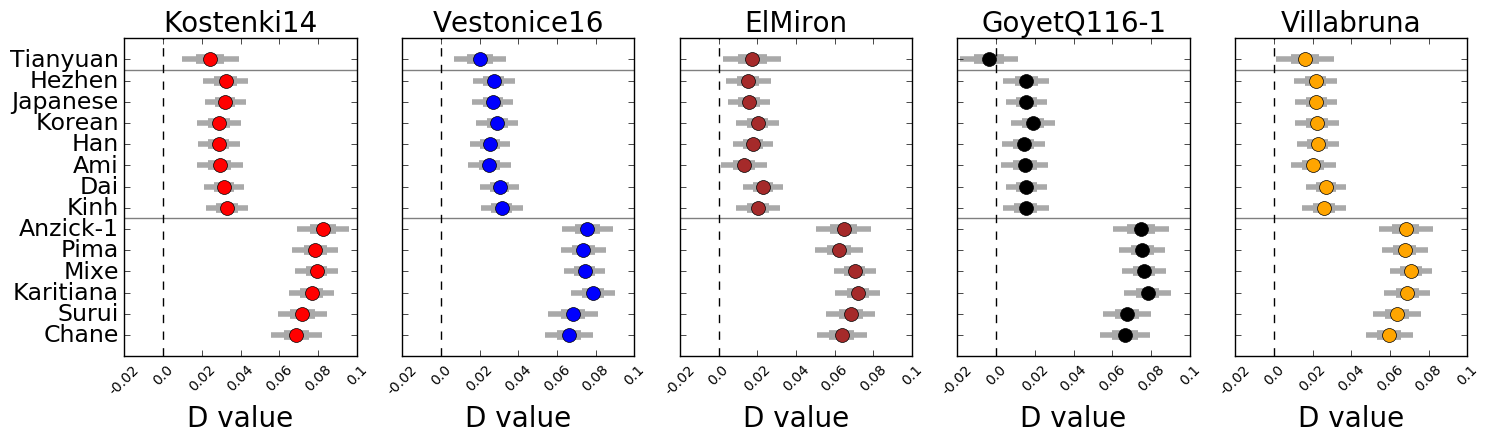

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import plotting_funcs as pf
pD = "/home/mel_yang/projects/allTYstuff/TY_MAAff/"
fhs = ["UPA_all2.rn1.071316","UPA_all2.rn1.071316.transv"]
outs = ['Mbuti']

otherpops = ['TY','Ami', 'Atayal', 'Burmese', 'Cambodian', 'Dai', 'Daur', 
              'Han', 'Hezhen', 'Japanese', 'Kinh', 'Korean', 'Lahu', 
              'Miao', 'Naxi', 'Oroqen', 'She', 'Thai', 'Tu', 'Tujia', 
              'Xibo', 'Yi'] ##Remove Uygur
easpops = ['Oroqen', 'Daur', 'Hezhen', 'Xibo', 'Japanese', 
             'Korean', 'Tu', 'Han', 'Tujia', 'Miao', 'Yi', 'She', 
             'Naxi', 'Atayal', 'Ami', 'Lahu', 'Dai', 'Kinh', 
             'Burmese', 'Thai', 'Cambodian'] ##BY LATITUDE
namers = ['Clovis','Pima','Mayan','Mixe','Zapotec','Piapoco',
          'Karitiana','Surui','Quechua','Chane']
namers = ['Clovis','Pima','Mayan','Mixe','Zapotec','Piapoco',
          'Karitiana','Surui','Quechua','Chane']
easpops = ['Hezhen','Japanese','Korean','Han','Ami','Dai','Kinh'] ##BY LATITUDE
namers = ['Clovis','Pima','Mixe','Karitiana','Surui','Chane']
wantedpops = namers[::-1]+easpops[::-1]+['TY']
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
mynames[mynames.index('Clovis')]='Anzick-1'
mynames[mynames.index('TY')]='Tianyuan'
fh="UPA_all2.rn1.071316"
mytwoeurs = [['Kostenki14','Vestonice16','ElMiron','GoyetQ116-1','Villabruna'],]
            #['Loschbour','LaBrana1','Hungarian.KO1','Motala12','Karelia']]
for myeurs in mytwoeurs:
    for out in outs:
        myset = "WE_Malta1_Asn_%s" % out
        main = ("Tianyuan","TY")
        fig = plt.figure(figsize=(15,4.5))
        colors = ['red','blue','brown','black','orange']
        
        myxmins = [-0.02]*len(myeurs)
        myxmaxs = [0.1]*len(myeurs)
        mylabel = ['A','B','C','D','E']
        if 'Karelia' in myeurs: mylabel = ['F','G','H','I','J']
        mylabellocation = [-0.04]*len(myeurs)
        
        #labels = [('P3','D(%s,P2,X,%s)' % (main[0],out),'X=')]*len(myeurs)
        for mysubplot,myeur in enumerate(myeurs):
            ax1=fig.add_subplot(1,5,mysubplot+1)
            
            #myylabel,mytitle,legendadd = labels[mysubplot]
                
            mycond = True if 'tp' in myset else False
            myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Zmat',mycond)
            myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Dmat',mycond)
            myZary=-myZary
            myDary=-myDary
            mySEary=myDary/myZary
            goodpops2 = [mypops2.index(i) for i in wantedpops]
            #getsmaller = [5,5,5]

            goodpops1 = mypops1.index(myeur)
            myys = np.array(range(len(goodpops2)))
            tyD = myDary[goodpops2,goodpops1]
            tySE = mySEary[goodpops2,goodpops1]
            ax1.errorbar(tyD,myys,xerr=tySE, color='darkgrey',fmt='o',capthick=0,linewidth=7)
            ax1.errorbar(tyD,myys,xerr=2*tySE, color='darkgrey',fmt='o',capthick=0,linewidth=4)
            ax1.plot(tyD,myys,'o',markersize=10,color=colors[mysubplot])
            
            ax1.set_yticks(myys) #,rotation=45)
            if mysubplot==0:
                ax1.set_yticklabels(mynames,fontsize=17)
            else: 
                ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
            ax1.set_ylim(-1,len(goodpops2))
            ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])
    
            xlabel = ax1.get_xticks().tolist()
            ax1.set_xticklabels(xlabel,rotation=45)
            
            ax1.set_title(myeur,fontsize=20)
            #ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
            ax1.axvline(x=0, ls='dashed', c='black')
            ax1.axhline(y=12.5, ls='solid', c='black',alpha=0.5)
            ax1.axhline(y=5.5, ls='solid', c='black',alpha=0.5)
            ax1.set_xlabel('D value',fontsize=20)
            #ax1.set_ylabel(myylabel,rotation=90,fontsize=17)
            #ax1.text(mylabellocation[mysubplot],-4.5,mylabel[mysubplot],fontsize=20)

            #mypatches = [mpatches.Patch(color=colors[ind], label=legendadd+i) for ind,i in enumerate(myeur)]
            #ax1.legend(loc='upper right',fontsize=10,handles=mypatches)
        #l = plt.legend(bbox_to_anchor=(-2,-0.1,3,-0.1),handles=mypatches,fontsize=11.5,ncol=4,mode="expand") #loc=leglocation[mysubplot], 
        #l.draw_frame(False)
        plt.tight_layout()
        plt.savefig(pD+fh+'.Dfig.'+'.png',bbox_inches='tight')
            


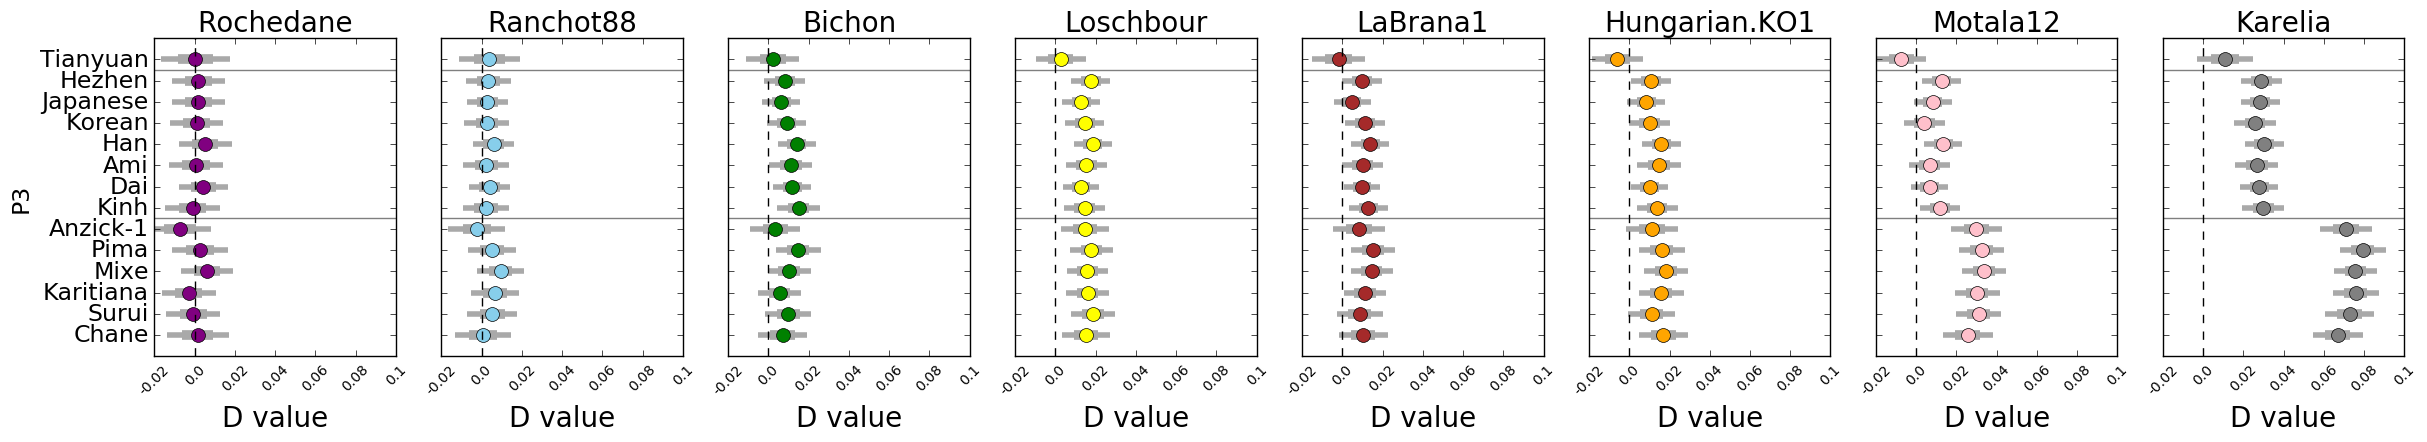

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import plotting_funcs as pf
pD = "/home/mel_yang/projects/allTYstuff/TY_MAAff/"
fhs = ["UPA_all2.rn1.071316","UPA_all2.rn1.071316.transv"]
outs = ['Mbuti']

otherpops = ['TY','Ami', 'Atayal', 'Burmese', 'Cambodian', 'Dai', 'Daur', 
              'Han', 'Hezhen', 'Japanese', 'Kinh', 'Korean', 'Lahu', 
              'Miao', 'Naxi', 'Oroqen', 'She', 'Thai', 'Tu', 'Tujia', 
              'Xibo', 'Yi'] ##Remove Uygur
easpops = ['Oroqen', 'Daur', 'Hezhen', 'Xibo', 'Japanese', 
             'Korean', 'Tu', 'Han', 'Tujia', 'Miao', 'Yi', 'She', 
             'Naxi', 'Atayal', 'Ami', 'Lahu', 'Dai', 'Kinh', 
             'Burmese', 'Thai', 'Cambodian'] ##BY LATITUDE
namers = ['Clovis','Pima','Mayan','Mixe','Zapotec','Piapoco',
          'Karitiana','Surui','Quechua','Chane']
easpops = ['Hezhen','Japanese','Korean','Han','Ami','Dai','Kinh'] ##BY LATITUDE
namers = ['Clovis','Pima','Mixe','Karitiana','Surui','Chane']
wantedpops = namers[::-1]+easpops[::-1]+['TY']
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
mynames[mynames.index('Clovis')]='Anzick-1'
mynames[mynames.index('TY')]='Tianyuan'
fh="UPA_all2.rn1.071316"
cs = ['Kostenki14','GoyetQ116-1','Vestonice16','ElMiron','Villabruna','Bichon','Rochedane','Ranchot88','Karelia',
         'Loschbour','LaBrana1','Hungarian.KO1','Motala12']
#mytwoeurs = [['Villabruna','Rochedane','Ranchot88','Karelia','Motala12'],
#         ['Bichon','Loschbour','LaBrana1','Hungarian.KO1']]
mytwoeurs = [['Rochedane','Ranchot88','Karelia','Motala12'],
         ['Bichon','Loschbour','LaBrana1','Hungarian.KO1']]
mytwoeurs = [['Rochedane','Ranchot88','Bichon','Loschbour','LaBrana1','Hungarian.KO1','Motala12','Karelia']]
#mytwoeurs = [['Villabruna','Rochedane','Ranchot88','Bichon','Loschbour','LaBrana1','Hungarian.KO1','Motala12','Karelia']]
for myeurs in mytwoeurs:
    for out in outs:
        myset = "WE_Villabruna_Asn_%s" % out
        #myset = "WE_Vestonice16_Asn_%s" % out
        main = ("Tianyuan","TY")
        fig = plt.figure(figsize=(30,4.5))
        colors = ['purple','skyblue','green','yellow','brown','orange','pink','gray','white']
        #colors = ['black','purple','skyblue','green','yellow','brown','orange','pink','gray','white']
        myxmins = [-0.02]*len(myeurs)
        myxmaxs = [0.1]*len(myeurs)
        mylabel = ['A','B','C','D','E','F','G','H','I','J']
        #if 'Bichon' in myeurs: mylabel = ['F','G','H','I','J']
        #mylabel = ['A','B','C','D']
        #if 'Bichon' in myeurs: mylabel = ['E','F','G','H','I','J']
        #mylabellocation = [-0.04]*len(myeurs)
        
        #labels = [('P3','D(%s,P2,X,%s)' % (main[0],out),'X=')]*len(myeurs)
        for mysubplot,myeur in enumerate(myeurs):
            ax1=fig.add_subplot(1,10,mysubplot+1)
            
            #myylabel,mytitle,legendadd = labels[mysubplot]
                
            mycond = True if 'tp' in myset else False
            myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Zmat',mycond)
            myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+myset+'.Dmat',mycond)
            myZary=myZary
            myDary=myDary
            mySEary=myDary/myZary
            goodpops2 = [mypops2.index(i) for i in wantedpops]
            #getsmaller = [5,5,5]

            goodpops1 = mypops1.index(myeur)
            myys = np.array(range(len(goodpops2)))
            tyD = myDary[goodpops2,goodpops1]
            tySE = mySEary[goodpops2,goodpops1]
            ax1.errorbar(tyD,myys,xerr=tySE, color='darkgrey',fmt='o',capthick=0,linewidth=7)
            ax1.errorbar(tyD,myys,xerr=2*tySE, color='darkgrey',fmt='o',capthick=0,linewidth=4)
            ax1.plot(tyD,myys,'o',markersize=10,color=colors[mysubplot])
            
            ax1.set_yticks(myys) #,rotation=45)
            if mysubplot==0:
                ax1.set_yticklabels(mynames,fontsize=17)
                ax1.set_ylabel("P3",rotation=90,fontsize=17)
            else: 
                ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
            ax1.set_ylim(-1,len(goodpops2))
            ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])
    
            xlabel = ax1.get_xticks().tolist()
            ax1.set_xticklabels(xlabel,rotation=45)
            
            ax1.set_title(myeur,fontsize=20)
            #ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
            ax1.axvline(x=0, ls='dashed', c='black')
            ax1.axhline(y=12.5, ls='solid', c='black',alpha=0.5)
            ax1.axhline(y=5.5, ls='solid', c='black',alpha=0.5)
            ax1.set_xlabel('D value',fontsize=20)
            
            #ax1.text(mylabellocation[mysubplot],-4.5,mylabel[mysubplot],fontsize=20)

            #mypatches = [mpatches.Patch(color=colors[ind], label=legendadd+i) for ind,i in enumerate(myeur)]
            #ax1.legend(loc='upper right',fontsize=10,handles=mypatches)
        #l = plt.legend(bbox_to_anchor=(-2,-0.1,3,-0.1),handles=mypatches,fontsize=11.5,ncol=4,mode="expand") #loc=leglocation[mysubplot], 
        #l.draw_frame(False)
        plt.tight_layout()
        plt.savefig(pD+fh+'.Dfig.'+'.png',bbox_inches='tight')
            
